In [1]:
from data_modules.decathlon import DecathlonDataModule

2024-09-30 06:04:59.721884: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-30 06:04:59.729540: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-30 06:04:59.739360: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-30 06:04:59.742538: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-30 06:04:59.751076: I tensorflow/core/platform/cpu_feature_guar

In [5]:
data_module = DecathlonDataModule(batch_size=4)

In [7]:
data_module.prepare_data()

2024-09-30 06:18:30,012 - INFO - Verified 'Task01_BrainTumour.tar', md5: 240a19d752f0d9e9101544901065d872.
2024-09-30 06:18:30,013 - INFO - File exists: data/Task01_BrainTumour.tar, skipped downloading.
2024-09-30 06:18:30,014 - INFO - Non-empty folder exists in data/Task01_BrainTumour, skipped extracting.


In [9]:
data_module.setup()
print(len(data_module.train_set))
print(len(data_module.val_set))

388
96


#### Inspecting the data

In [52]:
import matplotlib.pyplot as plt
import torch

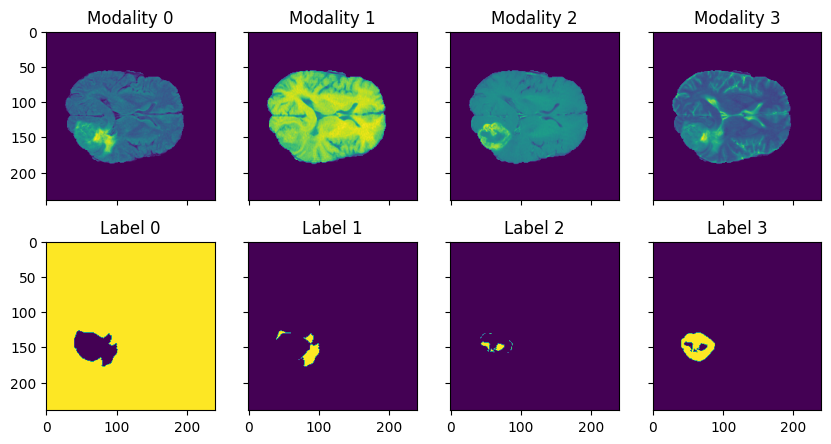

In [75]:
sample_idx = 0
slice = 70

sample = data_module.train_set[sample_idx]
img = sample['image']
label = sample['label'][0]

fig, axs = plt.subplots(2, 4, sharex=True, sharey=True, figsize=(10,5))

for i in range(4):
    axs[0, i].set_title(f'Modality {i}')
    axs[0, i].imshow(img[i, :, :, slice])

for i in range(4):
    axs[1, i].set_title(f'Label {i}')
    axs[1, i].imshow(torch.where(label[:, :, slice] == i, 1.0, 0.0))

plt.show()

For reference: 
```json
"modality": { 
	 "0": "FLAIR", 
	 "1": "T1w", 
	 "2": "t1gd",
	 "3": "T2w"
 },  
 "labels": { 
	 "0": "background", 
	 "1": "edema",
	 "2": "non-enhancing tumor",
	 "3": "enhancing tumour"
 }, 
```